<a href="https://colab.research.google.com/github/S3688570/Cars_Deep_Learning/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Model to Recognize Vehicle Accidents

In [76]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [77]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'  'Getting started.pdf'


##Import Keras library and packages

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras import backend as K
from keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

##Set parameters

In [0]:
epochs = 25 #@param {type:"number"}
validation_steps = 32 #@param {type:"number"}
img_height = 128 #@param {type:"integer"}
img_width = 128 #@param {type:"integer"}


##Set data filepaths

In [80]:
trainingCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/car/')
print ("Number of Training car images - ",str(len(trainingCarImages)))

trainingCrashImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/crash/')
print ("Number of Training crash images - ",str(len(trainingCrashImages)))

validCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/car/')
print ("Number of Validation car images - ",str(len(validCarImages)))

validCrashImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/crash/')
print ("Number of Validation crash images - ",str(len(validCrashImages)))

testTestImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/')
print ("Number of Test images - ",str(len(testTestImages)))

Number of Training car images -  1445
Number of Training crash images -  1445
Number of Validation car images -  375
Number of Validation crash images -  372
Number of Test images -  260


##Print image from training folder

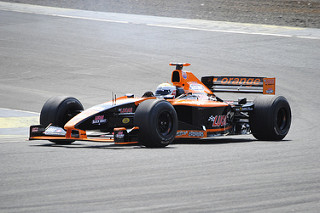

In [81]:
trainFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/car/'+trainingCarImages[2]
dimage = Image.open(trainFilename)
dimage

##Print image from validation folder

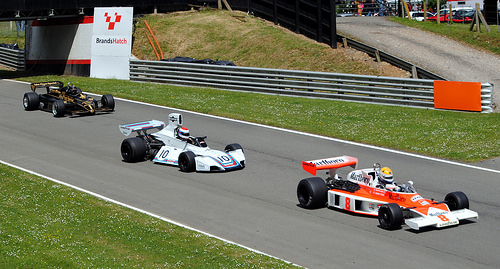

In [82]:
validFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/car/'+validCarImages[5]
dimage = Image.open(validFilename)
dimage

##Print image from test folder

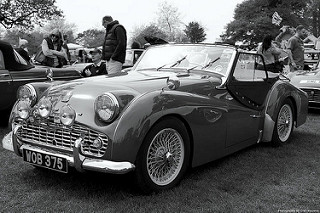

In [83]:
testFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/'+ testTestImages[30]
dimage = Image.open(testFilename)
dimage

###Determine image dimensions

In [84]:
train_data_dir = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/'
nb_train_samples = trainingCarImages + trainingCrashImages
nb_validation_samples = validCarImages + validCrashImages
nb_test_samples = testTestImages

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

print(input_shape)

(128, 128, 3)


In [0]:
#Method to print several images in a single row 
def plots(img, figsize=(12,6), rows = 1, titles = 1):
    if type(img[0]) is np.ndarray:
        img = np.array(img).astype(np.float_)
        if (img.shape[-1] != 3):
            img = img.transpose((0, 2, 3, 1))
    f =plt.figure(figsize = figsize)
    cols = 7//rows if (len(img) % 2 == 0) else len(img)//rows + 1
    for i in range(cols):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 10)
        plt.imshow(img[i], interpolation = None if np.interp else 'none')

##Create CNN model

In [86]:
# Initialising the CNN
classifier = Sequential()

# Layer 1 - convolution
classifier.add(Convolution2D(32, 3, 3, 
              input_shape = (img_width, img_height, 3), 
              activation = 'relu'))                       # Convolution
classifier.add(MaxPooling2D(pool_size = (2, 2)))          # MaxPooling
classifier.add(Dropout(0.25))                             # Dropout

#Add another convolutional layer
# classifier.add(Convolution2D(32, 3, 3, 
#               activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Layer 2 - convolution
classifier.add(Convolution2D(32, 3, 3, 
              activation = 'relu'))                       # Convolution layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))          # MaxPooling
classifier.add(Dropout(0.25))                             # Dropout

# Layer 3 - convolution
classifier.add(Convolution2D(32, 3, 3, 
              activation = 'relu'))                       # Convolution layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))          # MaxPooling
classifier.add(Dropout(0.25))                             # Dropout

# Layer 4 - convolution
classifier.add(Convolution2D(32, 3, 3, 
              activation = 'relu'))                       # Convolution layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))          # MaxPooling
classifier.add(Dropout(0.25))                             # Dropout

classifier.add(Flatten())                                 # Flattening

# Fully connected layer
classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))                # Dense layer
classifier.add(Dropout(0.25))                             # Dropout
classifier.add(Dense(output_dim = 1, 
                     activation = 'sigmoid'))             # Output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", un

##Compiling the CNN

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##Data augmentation

In [88]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle=True,
                                                 seed=42)

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set',
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle=True,
                                            seed=42)


Found 2890 images belonging to 2 classes.
Found 747 images belonging to 2 classes.


##Print normalized and re-sized images from training set

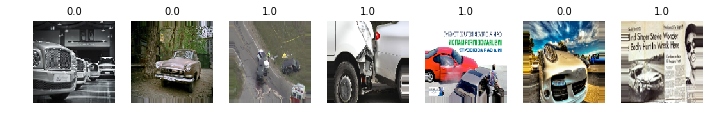

In [89]:
imgs, labels = next(training_set)
plots(imgs, titles = labels)

##Print normalized and re-sized images from validation set

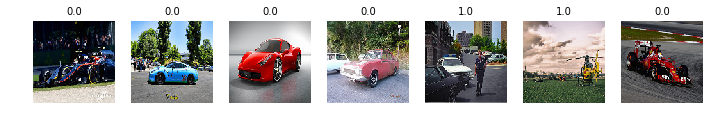

In [90]:
imgs, labels = next(test_set)
plots(imgs, titles = labels)

In [0]:
#Method to identify and remove corrupted images
def my_gen(gen):
    while True:
        try:
            imgs, labels = next(gen)
            yield imgs, labels
        except:
            pass

##Training the CNN model

In [92]:
history = classifier.fit_generator(my_gen(training_set),
                         steps_per_epoch = 78,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps = validation_steps)

Epoch 1/25
36/78 [============>.................] - ETA: 21s - loss: 0.6954 - acc: 0.5226

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


78/78 [==============================] - 47s 609ms/step - loss: 0.6867 - acc: 0.5501 - val_loss: 0.6839 - val_acc: 0.5464
Epoch 2/25
78/78 [==============================] - 42s 543ms/step - loss: 0.6594 - acc: 0.6084 - val_loss: 0.5945 - val_acc: 0.6670
Epoch 3/25
78/78 [==============================] - 41s 530ms/step - loss: 0.5940 - acc: 0.6947 - val_loss: 0.5261 - val_acc: 0.7678
Epoch 4/25
78/78 [==============================] - 41s 522ms/step - loss: 0.5735 - acc: 0.7234 - val_loss: 0.5012 - val_acc: 0.8166
Epoch 5/25
78/78 [==============================] - 42s 543ms/step - loss: 0.5380 - acc: 0.7385 - val_loss: 0.5060 - val_acc: 0.8086
Epoch 6/25
78/78 [==============================] - 40s 511ms/step - loss: 0.5214 - acc: 0.7623 - val_loss: 0.5286 - val_acc: 0.7108
Epoch 7/25
78/78 [==============================] - 41s 529ms/step - loss: 0.4917 - acc: 0.7687 - val_loss: 0.4374 - val_acc: 0.7916
Epoch 8/25
78/78 [==============================] - 41s 521ms/step - loss: 0.465

In [93]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


##Plot training and validation accuracy per epoch

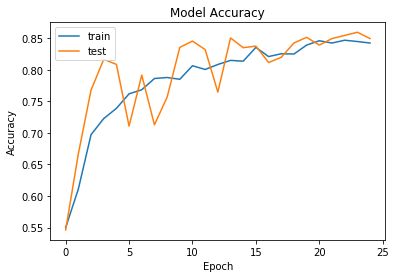

In [94]:
import matplotlib.pyplot as plt
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Plot training and validation loss per epoch

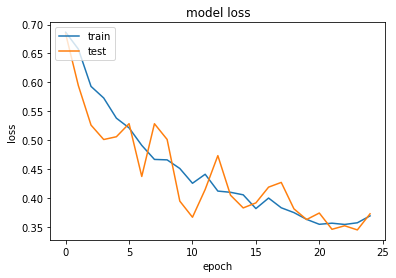

In [95]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
training_set.class_indices

{'car': 0, 'crash': 1}

##Prediction

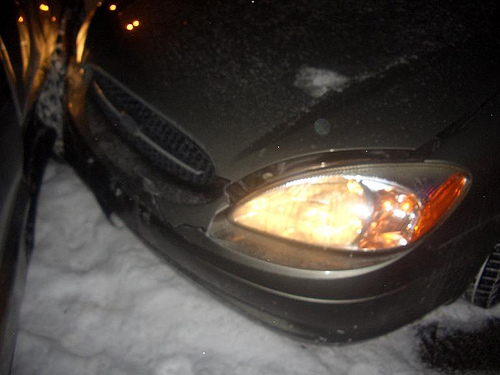

In [119]:
testCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/')
testFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/' + testCarImages[225]

test_image = image.load_img(testFilename, target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
test_set.class_indices
if result[0][0] >= 0.8:
  prediction = 'crash'
else: 
  prediction = 'car'


dimage = Image.open(testFilename)
dimage


In [120]:
print(prediction)

car
